# Análise dos jogadores presentes da Premier League na temporada 2020

In [1]:
#Importando conteudo
import pandas as pd
import matplotlib.pyplot as plt

jogadoresDF = pd.read_csv('dataset - 2020-09-24.csv')


C:\Users\victo\AppData\Local\Temp\ipykernel_4884\762938579.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#Visualizando tabela
display(jogadoresDF)

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,Pedro Neto,7.0,Wolverhampton-Wanderers,Forward,Portugal,20.0,31,14,7,3,...,NaN,NaN,NaN,NaN,NaN,NaN,3,0,16,5.0
567,Raúl Jiménez,9.0,Wolverhampton-Wanderers,Forward,Mexico,29.0,78,32,23,32,...,NaN,NaN,NaN,NaN,NaN,NaN,7,0,81,52.0
568,Adama Traoré,37.0,Wolverhampton-Wanderers,Forward,Spain,24.0,105,27,47,5,...,NaN,NaN,NaN,NaN,NaN,NaN,4,0,80,13.0
569,Fábio Silva,17.0,Wolverhampton-Wanderers,Forward,Portugal,18.0,1,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0


In [3]:
#Visualizando informações gerais sobre as colunas
print(jogadoresDF.info())
jogadoresDF.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    571 non-null    object 
 1   Jersey Number           563 non-null    float64
 2   Club                    571 non-null    object 
 3   Position                571 non-null    object 
 4   Nationality             570 non-null    object 
 5   Age                     570 non-null    float64
 6   Appearances             571 non-null    int64  
 7   Wins                    571 non-null    int64  
 8   Losses                  571 non-null    int64  
 9   Goals                   571 non-null    int64  
 10  Goals per match         309 non-null    float64
 11  Headed goals            502 non-null    float64
 12  Goals with right foot   502 non-null    float64
 13  Goals with left foot    502 non-null    float64
 14  Penalties scored        309 non-null    fl

Index(['Name', 'Jersey Number', 'Club', 'Position', 'Nationality', 'Age',
       'Appearances', 'Wins', 'Losses', 'Goals', 'Goals per match',
       'Headed goals', 'Goals with right foot', 'Goals with left foot',
       'Penalties scored', 'Freekicks scored', 'Shots', 'Shots on target',
       'Shooting accuracy %', 'Hit woodwork', 'Big chances missed',
       'Clean sheets', 'Goals conceded', 'Tackles', 'Tackle success %',
       'Last man tackles', 'Blocked shots', 'Interceptions', 'Clearances',
       'Headed Clearance', 'Clearances off line', 'Recoveries', 'Duels won',
       'Duels lost', 'Successful 50/50s', 'Aerial battles won',
       'Aerial battles lost', 'Own goals', 'Errors leading to goal', 'Assists',
       'Passes', 'Passes per match', 'Big chances created', 'Crosses',
       'Cross accuracy %', 'Through balls', 'Accurate long balls', 'Saves',
       'Penalties saved', 'Punches', 'High Claims', 'Catches',
       'Sweeper clearances', 'Throw outs', 'Goal Kicks', 'Yellow 

### Análise de idade

* Chelsea tem a menor concentração de jogadores mais experientes
* Leicester possui a maior concentração de jogadores mais experientes
* Sheffield possui o jogador mais velho, com 38 anos
* 17 anos é a menor idade registrada até então
* Everton tem a divisão mais simétrica de idades

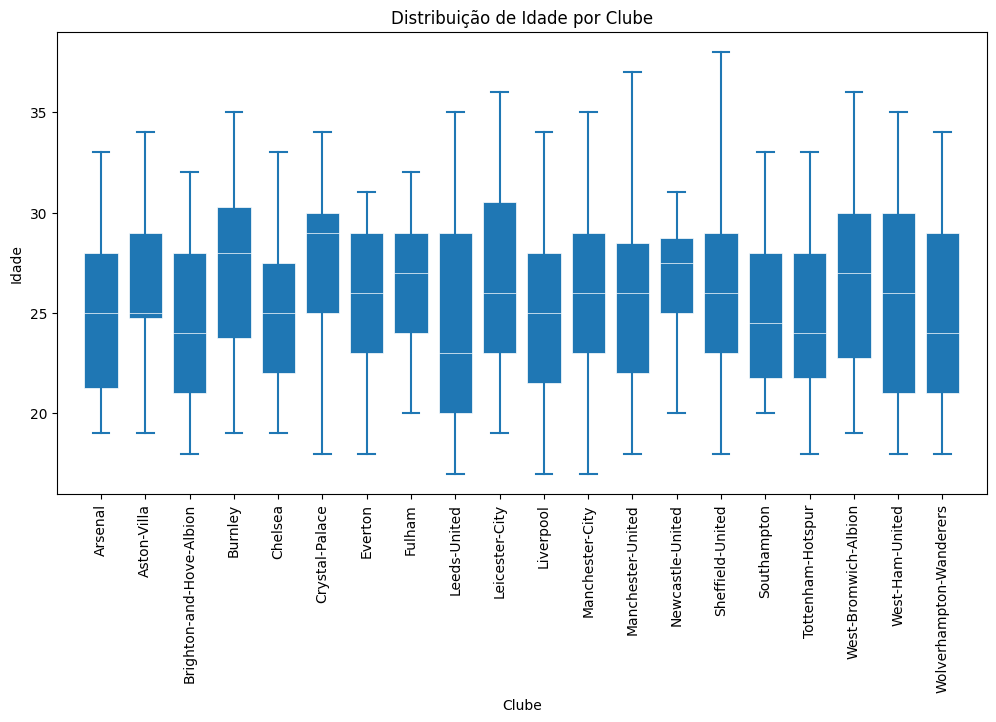

In [29]:
import numpy as np
jogadoresDF = jogadoresDF.dropna(subset=['Age', 'Club'])

#Agrupar as idades por clube
clubes = jogadoresDF['Club'].unique()
dados_por_clube = [jogadoresDF[jogadoresDF['Club'] == clube]['Age'].values for clube in clubes]

#Preparar posições para os boxplots
num_clubes = len(clubes)
posicoes = np.arange(1, num_clubes + 1) * 2

#estilização
fig, ax = plt.subplots(figsize=(12, 6))
VP = ax.boxplot(dados_por_clube, positions=posicoes, widths=1.5, patch_artist=True,
                showmeans=False, showfliers=False,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C0", "edgecolor": "white", "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5})

#Configurar os limites e rótulos dos eixos
ax.set_xlim(0, max(posicoes) + 2)
ax.set_xticks(posicoes)
ax.set_xticklabels(clubes)
ax.set_ylim(min([min(ages) for ages in dados_por_clube if len(ages) > 0]) - 1,
            max([max(ages) for ages in dados_por_clube if len(ages) > 0]) + 1)


plt.title('Distribuição de Idade por Clube')
plt.xlabel('Clube')
plt.ylabel('Idade')
plt.xticks(rotation=90)

plt.show()


### Número de jogadores por nacionalidade

Com o passar dos anos, tem dito-se que os jogadores estrangeiros têm dominado o campeonato inglês, mas ao analisármos o número de jogadores por nacionalidade, a Inglaterra permanece soberana, com um total de 221 jogadores, representando 38,7% em relação ao total.


Nationality
England                             221
France                               30
Spain                                28
Brazil                               24
Ireland                              24
Portugal                             21
Scotland                             20
Netherlands                          18
Argentina                            13
Belgium                              13
Wales                                13
Germany                              12
Poland                                7
Cote D'Ivoire                         7
Denmark                               7
United States                         6
Northern Ireland                      6
Nigeria                               6
Ghana                                 5
Serbia                                5
Egypt                                 5
Colombia                              5
Italy                                 5
Switzerland                           4
The Democratic Republic Of C

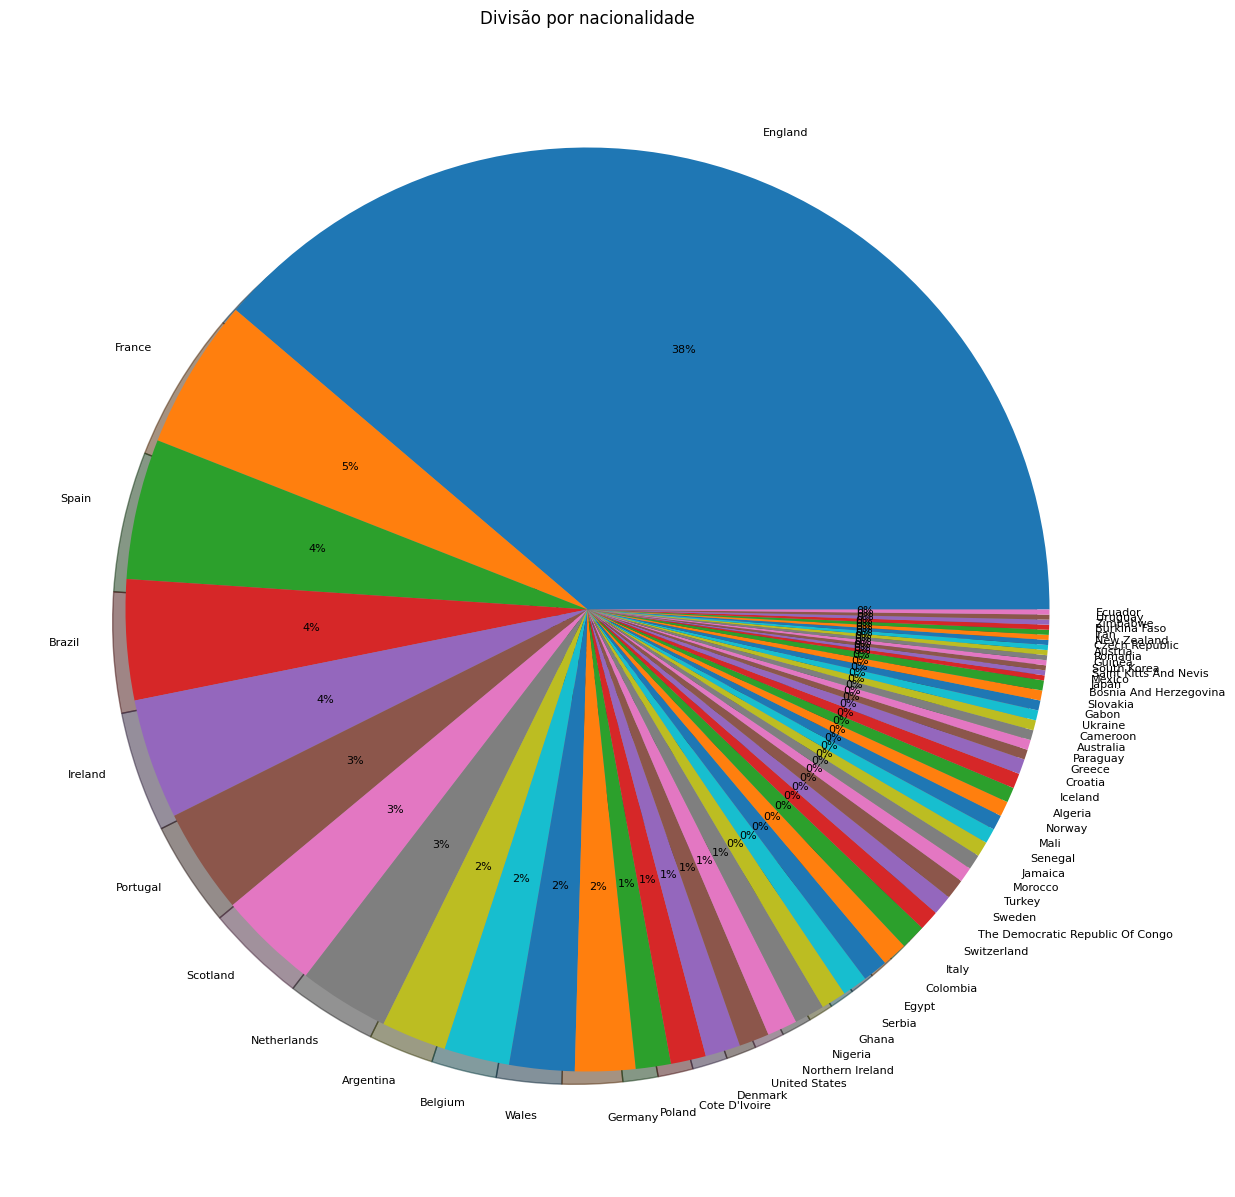

In [4]:

#contando o número de jogares por nacionalidade
contagem_nacionalidade = jogadoresDF['Nationality'].value_counts()
print(contagem_nacionalidade)

#contando o total de jogadores
total_jogadores = jogadoresDF.shape[0]
#print("Total de linhas:", total_jogadores)

#porcentagem dos jogadores ingleses
porcentagem = 221 / total_jogadores
print(f"A porcentagem inglesa foi de: {porcentagem:.2%}")
plt.figure(figsize=(15,15))#muda proporcao da figura

plt.pie(contagem_nacionalidade, labels=contagem_nacionalidade.index, autopct='%d%%', shadow=True, textprops={'fontsize': 8}) 
plt.title('Divisão por nacionalidade')
plt.show()


### Principais nacionalidades dos jogadores por continentes estrangeiros:

As porcentagens dos principais países por continente foram: Brasil 5.25%, Estados Unidos 1.05%, Australia 0.35%, Costa do Marfim 1.23% e Japão e Coreia do Sul 0.18%

As porcentagens foram Brasil 4.20%, Estados Unidos 1.05%, Australia 0.35%, Costa do Marfim 1.23%, Japão e Coreia do Sul 0.18%


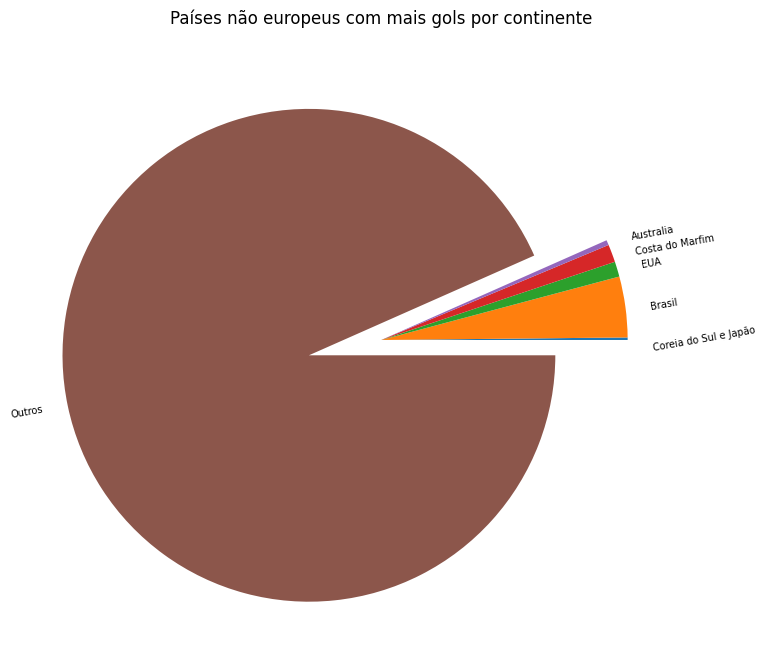

In [5]:
Brasil = 24 / total_jogadores
EUA =  6 / total_jogadores
Australia = 2 / total_jogadores
Costa_Marfim = 7 / total_jogadores
Japao_and_CoreiaSul= 1 / total_jogadores

print(f'As porcentagens foram Brasil {Brasil:.2%}, Estados Unidos {EUA:.2%}, Australia {Australia:.2%}, Costa do Marfim {Costa_Marfim:.2%}, Japão e Coreia do Sul {Japao_and_CoreiaSul:.2%}')


#print(total_jogadores - 24 + 6 + 2 + 7 + 1) 

paises = [ 'Coreia do Sul e Japão', 'Brasil', 'EUA', 'Costa do Marfim', 'Australia', 'Outros' ]
valores = [1, 24, 6, 7, 2, 563]
plt.figure(figsize=(8,8))#muda proporcao da figura

destaques =[0,0,0,0,0,0.3]#serve para destacar fatias
plt.pie(valores, labels= paises, textprops={'rotation': 10, 'fontsize' : 7}, explode= destaques)
plt.title('Países não europeus com mais gols por continente')
plt.show()

# Análise dos atletas brasileiros.

### Quem são os 24 atletas brasileiros na competição?

In [6]:
#Exibe através do do metódo loc apenas os atleteas com a na nacionalidade do Brasil
brasileiros = jogadoresDF.loc[jogadoresDF['Nationality'] == 'Brazil', :]
display(brasileiros)

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
10,David Luiz,23.0,Arsenal,Defender,Brazil,33.0,194,113,38,13,...,NaN,NaN,NaN,NaN,NaN,NaN,40,3,212,5.0
12,Gabriel Magalhães,6.0,Arsenal,Defender,Brazil,22.0,2,2,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,3,0.0
28,Gabriel Martinelli,35.0,Arsenal,Forward,Brazil,19.0,14,3,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,9,2.0
29,Willian,12.0,Arsenal,Forward,Brazil,32.0,236,137,47,37,...,NaN,NaN,NaN,NaN,NaN,NaN,21,1,131,33.0
44,Douglas Luiz,6.0,Aston-Villa,Midfielder,Brazil,22.0,37,10,20,3,...,NaN,NaN,NaN,NaN,NaN,NaN,8,0,51,0.0
54,Wesley,9.0,Aston-Villa,Forward,Brazil,23.0,21,6,12,5,...,NaN,NaN,NaN,NaN,NaN,NaN,3,0,43,14.0
66,Bernardo,30.0,Brighton-and-Hove-Albion,Defender,Brazil,25.0,36,9,16,0,...,NaN,NaN,NaN,NaN,NaN,NaN,5,0,20,6.0
126,Thiago Silva,6.0,Chelsea,Defender,Brazil,36.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0
190,Allan,6.0,Everton,Midfielder,Brazil,29.0,2,2,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,4,0.0
196,Richarlison,7.0,Everton,Forward,Brazil,23.0,111,41,47,31,...,NaN,NaN,NaN,NaN,NaN,NaN,17,1,114,56.0


### Quais são os brasileiros com mais partidas, vitórias, derrotas, gols e assistências?
* Willian é o jogador com mais aparições, teve um total de 236 partidas.
* Fernandinho é o jogador com mais vitórias, teve um total de 156 vitórias.
* Willian e Richerlison são os jogadores com mais derrotas, tiveram um total de 47 derrotas.
* Firmino é o jogador com mais gols, teve um total de 57 gols.
* Firmino é o jogador com mais assistências, teve um total de 36 passes para gol.



 


In [7]:
#maior valor na coluna de vitorias
maior_valor = brasileiros['Wins'].max()
print("Maior valor da coluna:", maior_valor)
#maior valor na coluna de derrotas
maior_valor2 = brasileiros['Losses'].max()
print("Maior valor da coluna:", maior_valor2)
#maior valor na coluna de gols
maior_valor3 = brasileiros['Goals'].max()
print("Maior valor da coluna:", maior_valor3)
#maior valor coluna de assistencias
maior_valor4 = brasileiros['Assists'].max()
print("Maior valor da coluna:", maior_valor4)

#df do jogador com mais vitorias
print('\nJogador com mais vitórias:')
Mais_Vitorioso = brasileiros.loc[brasileiros['Wins'] == maior_valor, :]
display(Mais_Vitorioso)
#df do jogador com mais derrotas
print('Jogador com mais derrotado:')
Menos_Vitorioso = brasileiros.loc[brasileiros['Losses'] == maior_valor2, :]
display(Menos_Vitorioso)
#df do jogador com mais gols
print('Jogador com mais gols:')
Artilheiro = brasileiros.loc[brasileiros['Goals'] == maior_valor3, :]
display(Artilheiro)
#df do jogador com mais assists
print('Jogador com mais assistencias:')
Garcom = brasileiros.loc[brasileiros['Assists'] == maior_valor4, :]
display(Garcom)
#df do jogador com mais partidas
print('Jogador com mais partidas:')
Total_partidas = brasileiros.loc[brasileiros['Appearances'] == 236, :]
display(Total_partidas)

Maior valor da coluna: 156
Maior valor da coluna: 47
Maior valor da coluna: 57
Maior valor da coluna: 36

Jogador com mais vitórias:


,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
337,Fernandinho,25.0,Manchester-City,Midfielder,Brazil,35.0,225,156,36,18,...,NaN,NaN,NaN,NaN,NaN,NaN,46,4,324,4.0


Jogador com mais derrotado:


,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
29,Willian,12.0,Arsenal,Forward,Brazil,32.0,236,137,47,37,...,NaN,NaN,NaN,NaN,NaN,NaN,21,1,131,33.0
196,Richarlison,7.0,Everton,Forward,Brazil,23.0,111,41,47,31,...,NaN,NaN,NaN,NaN,NaN,NaN,17,1,114,56.0


Jogador com mais gols:


,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
312,Roberto Firmino,9.0,Liverpool,Forward,Brazil,28.0,177,115,23,57,...,NaN,NaN,NaN,NaN,NaN,NaN,8,0,206,60.0


Jogador com mais assistencias:


,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
312,Roberto Firmino,9.0,Liverpool,Forward,Brazil,28.0,177,115,23,57,...,NaN,NaN,NaN,NaN,NaN,NaN,8,0,206,60.0


Jogador com mais partidas:


,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
29,Willian,12.0,Arsenal,Forward,Brazil,32.0,236,137,47,37,...,NaN,NaN,NaN,NaN,NaN,NaN,21,1,131,33.0


### Qual o clube com mais jogadores brasileiros?
Arsenal é o time com mais atletas brasileiros, com um total de 4 atletas

Club
Arsenal                     4
Everton                     3
Liverpool                   3
Manchester-City             3
Aston-Villa                 2
Manchester-United           2
Brighton-and-Hove-Albion    1
Chelsea                     1
Newcastle-United            1
Tottenham-Hotspur           1
West-Bromwich-Albion        1
West-Ham-United             1
Wolverhampton-Wanderers     1
Name: count, dtype: int64


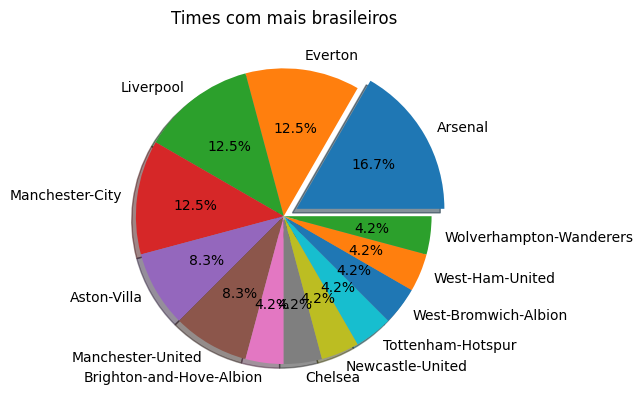

<Figure size 500x1500 with 0 Axes>

In [30]:
time_mais_br = brasileiros['Club'].value_counts()
print(time_mais_br)

destaques =[0.1,0,0,0,0,0,0,0,0,0,0,0,0]
plt.pie(time_mais_br, labels=time_mais_br.index, autopct='%.1f%%', shadow=True, explode= destaques)
plt.title('Times com mais brasileiros')
plt.figure(figsize=(5,15))#muda proporcao da figura
plt.show()

### Qual posição conta com a maior concentração de brasileiros?
É a de atacante, com 10 jogadores.

Position
Forward       10
Midfielder     7
Defender       5
Goalkeeper     2
Name: count, dtype: int64


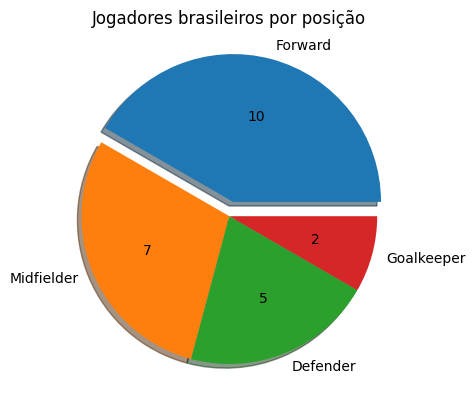

In [9]:
Principal_posicao = brasileiros['Position'].value_counts()
print(Principal_posicao)

# Função lambda para formatar os valores absolutos ao inves de porcentagem no autopct
autopct = lambda p: f'{p * sum(Principal_posicao) / 100:.0f}'

destaques =[0.1,0,0,0]
plt.pie(Principal_posicao, labels=Principal_posicao.index, autopct=autopct, shadow=True, explode= destaques)
plt.title("Jogadores brasileiros por posição")
plt.show()

# Destaques ofensivos
* Artilheiro: Aguero
* Garçom: Milner
### Quais são maiores artilheiros da liga?


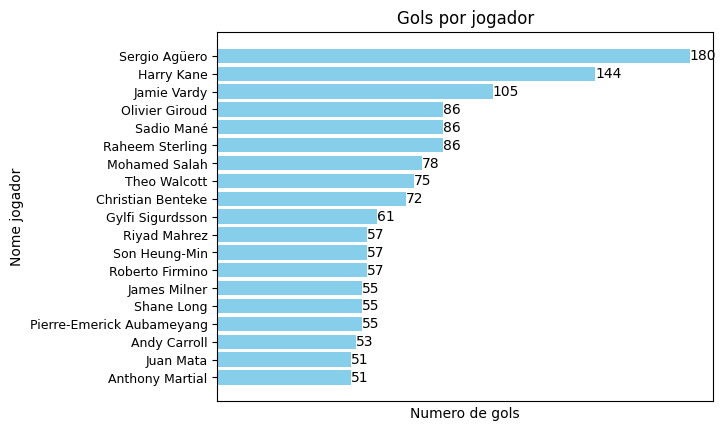

In [10]:
#plt.pie(jogadoresDF['Name'],labels=jogadoresDF['Goals'],autopct='%.1f', shadow= True)
# Remover linhas com valores nulos nas colunas 'Goals' e 'Nationality'
#jogadoresDF = jogadoresDF.dropna(subset=['Goals', 'Nationality'])

# Remover linhas onde 'Goals' é igual a zero
'''jogadoresDF = jogadoresDF[jogadoresDF['Goals'] > 100]
plt.pie(jogadoresDF['Goals'], labels=jogadoresDF['Name'], autopct='%.1f%%', shadow=True)
plt.show()'''


jogadoresDF_mais_gols = jogadoresDF[jogadoresDF['Goals'] > 50]
#Coloca grafico em ordem decrescente
jogadoresDF_mais_gols = jogadoresDF_mais_gols.sort_values(by='Goals', ascending=True)
barras =plt.barh(jogadoresDF_mais_gols['Name'], jogadoresDF_mais_gols['Goals'], color='skyblue')
plt.bar_label(barras)
#jogadoresDF_mais_gols = jogadoresDF_mais_gols.sort_values(by='Goals', ascending=True)
plt.title('Gols por jogador')
plt.ylabel('Nome jogador')
plt.xlabel('Numero de gols')
plt.yticks(rotation=0, fontsize=9)
plt.xticks([])
plt.show()



### Maiores garçons


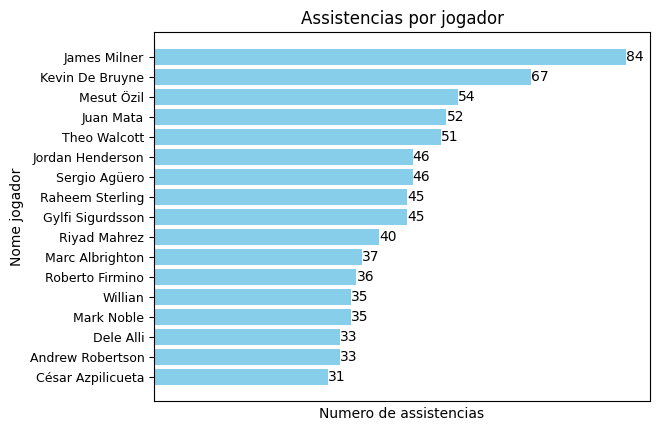

In [11]:
jogadoresDF_mais_assists = jogadoresDF[jogadoresDF['Assists'] > 30] 
#Coloca grafico em ordem decrescente
jogadoresDF_mais_assists = jogadoresDF_mais_assists.sort_values(by='Assists', ascending=True)
barras2 =plt.barh(jogadoresDF_mais_assists['Name'], jogadoresDF_mais_assists['Assists'], color='skyblue')
plt.bar_label(barras2)
#jogadoresDF_mais_gols = jogadoresDF_mais_gols.sort_values(by='Goals', ascending=True)
plt.title('Assistencias por jogador')
plt.ylabel('Nome jogador')
plt.xlabel('Numero de assistencias')
plt.yticks(rotation=0, fontsize=9)
plt.xticks([])
plt.show()

# Análise dos goleiros
* Mais defesas: Hart
* Mais clean sheets: Hart
* Maior pegador de penaltis: Hart
* Melhor média de defesas: Tom Heaton

### Goleiros com mais defesas


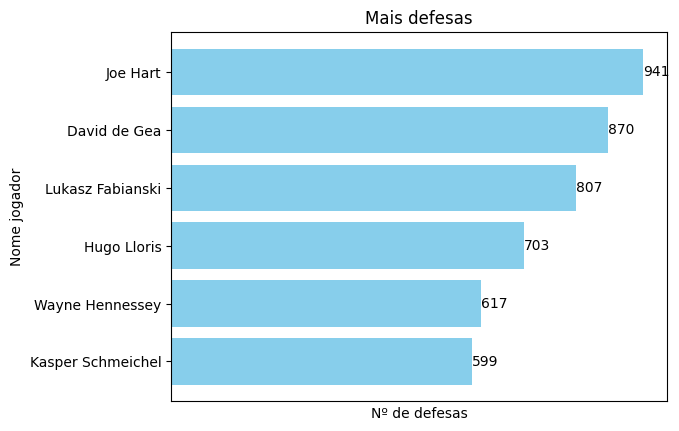

In [12]:
jogadoresDF_mais_defesas = jogadoresDF[jogadoresDF['Saves'] > 500] 
#Coloca grafico em ordem decrescente
jogadoresDF_mais_defesas = jogadoresDF_mais_defesas.sort_values(by='Saves', ascending=True)
barras3 =plt.barh(jogadoresDF_mais_defesas['Name'], jogadoresDF_mais_defesas['Saves'], color='skyblue')
plt.bar_label(barras3)
plt.title('Mais defesas')
plt.ylabel('Nome jogador')
plt.xlabel('Nº de defesas')
plt.xticks([])

plt.show()

### Goleiros com mais clean sheets

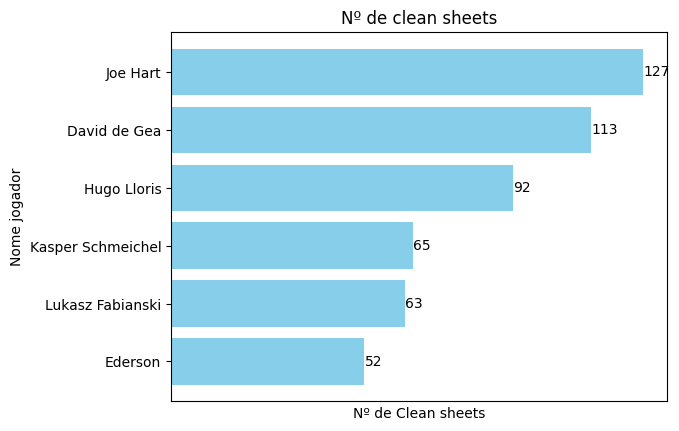

In [31]:
clean_sheetsDF = jogadoresDF[(jogadoresDF['Clean sheets'] > 50) & (jogadoresDF['Position'] == 'Goalkeeper')]
#Coloca grafico em ordem decrescente
clean_sheetsDF = clean_sheetsDF.sort_values(by='Clean sheets', ascending=True)
barras4 = plt.barh(clean_sheetsDF['Name'], clean_sheetsDF['Clean sheets'], color = 'skyblue')
plt.bar_label(barras4)
plt.ylabel('Nome jogador')
plt.xlabel('Nº de Clean sheets')
plt.xticks([])
plt.title("Nº de clean sheets")

plt.show()

### Maiores pegadores de penaltis


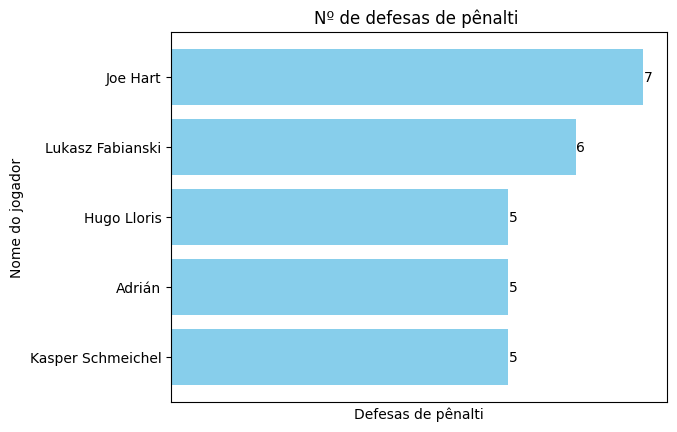

In [14]:
penaltisaveDF = jogadoresDF[(jogadoresDF['Penalties saved'] > 4)]
#Coloca grafico em ordem decrescente
penaltisaveDF = penaltisaveDF.sort_values(by='Penalties saved', ascending=True)
barras5 = plt.barh(penaltisaveDF['Name'], penaltisaveDF['Penalties saved'], color = 'skyblue')
plt.bar_label(barras5)
plt.title('Nº de defesas de pênalti ')
plt.xlabel('Defesas de pênalti')
plt.ylabel('Nome do jogador')

plt.xticks([])

plt.show()

### Defesas por jogo


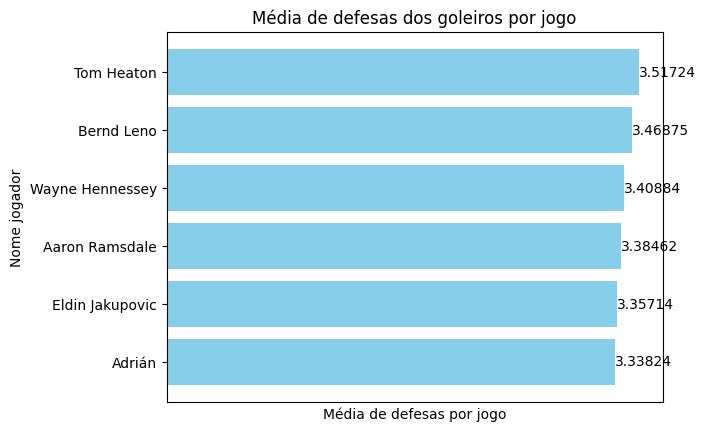

In [15]:
#Cria uma nova coluna com a media de defesas
jogadoresDF['Defesas por jogo'] = jogadoresDF['Saves'] / jogadoresDF['Appearances']
#display(jogadoresDF)

defesa_por_jogoDF = jogadoresDF[(jogadoresDF['Defesas por jogo'] > 3.3) & (jogadoresDF['Appearances'] > 20)]
#Coloca grafico em ordem decrescente
defesa_por_jogoDF = defesa_por_jogoDF.sort_values(by='Defesas por jogo', ascending=True)
barras6 = plt.barh(defesa_por_jogoDF['Name'], defesa_por_jogoDF['Defesas por jogo'], color = 'skyblue')
plt.bar_label(barras6)
plt.xticks([])
plt.title('Média de defesas dos goleiros por jogo')
plt.ylabel('Nome jogador')
plt.xlabel('Média de defesas por jogo')

plt.show()

# Ánalise defensiva

* Mais duelos perdidos: Milner
* Mais duelos vencidos: 1º Cahil, 2º Milner
* Melhor taxa de desarmes com sucesso: Mings
* Observação: A presença de James Milner no topo da quantidade de duelos vencidos e perdidos, é no mímimo curiosa, demonstrando a vitalidade do atleta em campo e sua proatividade

### Jogadores com mais duelos perdidos


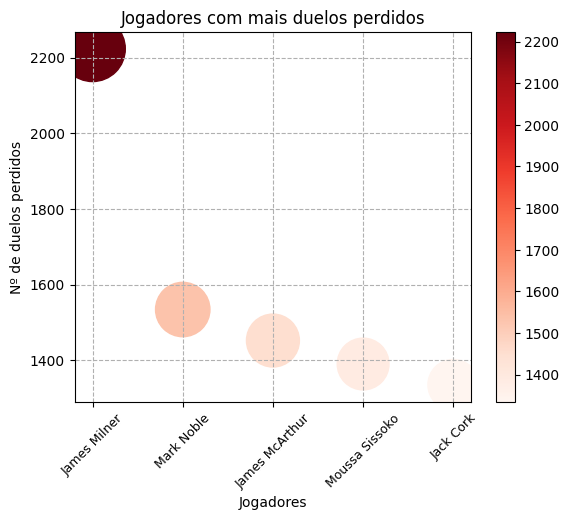

2223.0


In [16]:
#Criando grafico de dispersao
duelosPerdidosDF = jogadoresDF[(jogadoresDF['Duels lost'] > 1300)]
#Coloca grafico em ordem decrescente
duelosPerdidosDF = duelosPerdidosDF.sort_values(by='Duels lost', ascending=False)
plt.scatter(duelosPerdidosDF['Name'], duelosPerdidosDF['Duels lost'], s=duelosPerdidosDF['Duels lost'], c=duelosPerdidosDF['Duels lost'], cmap='Reds')#s = receita faz as bolas crescerem de acordo com o valor da receita

plt.xlabel('Jogadores')
plt.ylabel("Nº de duelos perdidos")
plt.title('Jogadores com mais duelos perdidos')
plt.grid(True, linestyle='--')
plt.xticks(rotation=45, fontsize=9)
plt.colorbar()#cria uma legenda pras cores

plt.show()



print(jogadoresDF['Duels lost'].max())

### Jogadores com mais duelos vencidos

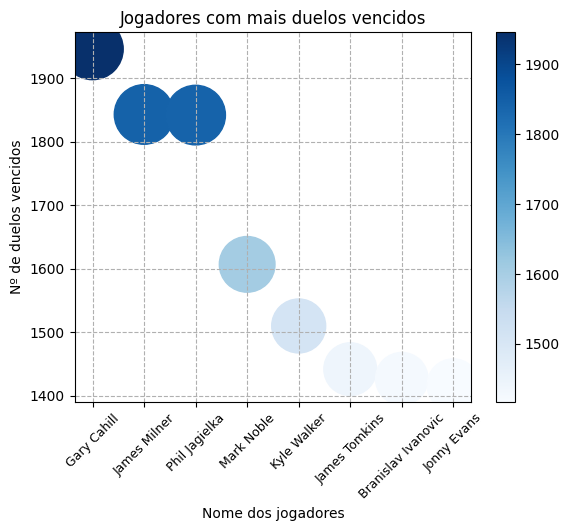

In [17]:
#Criando grafico de dispersao
duelosVencidosDF = jogadoresDF[(jogadoresDF['Duels won'] > 1400)]
#Coloca grafico em ordem decrescente
duelosVencidosDF = duelosVencidosDF.sort_values(by='Duels won', ascending=False)
plt.scatter(duelosVencidosDF['Name'], duelosVencidosDF['Duels won'], s=duelosVencidosDF['Duels won'], c=duelosVencidosDF['Duels won'], cmap='Blues')#s = receita faz as bolas crescerem de acordo com o valor da receita

plt.xlabel('Nome dos jogadores')
plt.ylabel("Nº de duelos vencidos")
plt.title('Jogadores com mais duelos vencidos')
plt.grid(True, linestyle='--')
plt.xticks(rotation=45, fontsize=9)
plt.colorbar()#cria uma legenda pras cores

plt.show()



#print(jogadoresDF['Duels won'].max())

### Melhores ladrões de bola

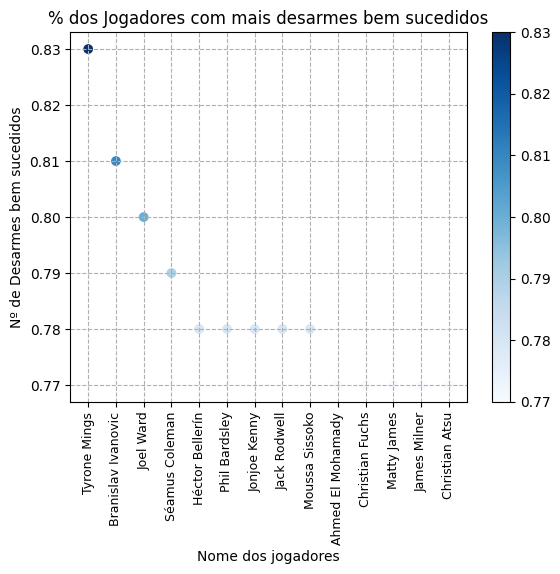

In [18]:
import numpy as np 
# Função para converter porcentagem string para float
def convert_to_float(value):
    if pd.isna(value):  # Verifica se o valor é NaN
        return np.nan
    else:
        return float(value.strip('%')) / 100

# Aplicando a função à coluna de Tackle success que está em string e a convertendo pra float; Aplicar apenas 1 vez
jogadoresDF['Tackle success %'] = jogadoresDF['Tackle success %'].apply(convert_to_float)


#print(jogadoresDF['Tackle success %'].max())

#Condicao de mais de 20 partidas para a análise fazer sentido
top_tackles = jogadoresDF[(jogadoresDF['Tackle success %'] > 0.76) & (jogadoresDF['Appearances'] > 20)] #jogadoresDF.nlargest(10, 'Tackle success %')
#Coloca grafico em ordem decrescente
top_tackles = top_tackles.sort_values(by='Tackle success %', ascending=False)
plt.scatter(top_tackles['Name'], top_tackles['Tackle success %'], c=top_tackles['Tackle success %'], cmap='Blues')

plt.xlabel('Nome dos jogadores')
plt.ylabel("Nº de Desarmes bem sucedidos")
plt.title('% dos Jogadores com mais desarmes bem sucedidos')
plt.grid(True, linestyle='--')
plt.xticks(rotation=90, fontsize=9)
plt.colorbar()#cria uma legenda pras cores

plt.show()

# Destaques sub-23 (Promessas)

## Atacantes:
#### Marcus Rashford - Machester United
- O Atacante se destaca liderando as estatísticas de Gols, além de estar no top3 de Assistências e Chances de gols criadas com, respectivamente: 44 gols(Média de 0,29 por jogo), 21 assists e 27 chances criadas.

## Meio-Campistas:
#### Declan Rice - West Ham
* 2º lugar geral Nº de Interceptações  (1º entre os Meio-campistas)
* 1º lugar geral Nº de Duelos Áereos Vencidos 
* 2º lugar geral Nº de Duelos Vencidos  (1º entre os Meio-campistas)
* 5º lugar geral na média de passes por partida 

#### Dwight McNeil - Burnley
* 3º lugar geral Nº de Assistências (1º entre os Meio-campistas)
* 3º lugar geral Nº participações para gol (1º entre os Meio-campistas)

## Defensores:

#### Trent Arnold
* 1º lugar geral Nº de Assistências 
* 1º lugar geral Nº participações para gol
* 1º lugar geral na média de passes por partida 
* 3º lugar geral Nº de Interceptações 
* 3º lugar geral Nº de Duelos Vencidos  

#### Wan Bissaka
* 1º lugar geral Nº de Interceptações  
* 2º lugar geral Nº de Duelos Áereos Vencidos 
* 1º lugar geral Nº de Duelos Vencidos  
* 4º lugar geral na média de passes por partida 

### Mais gols sub-23

,Club
107,Burnley


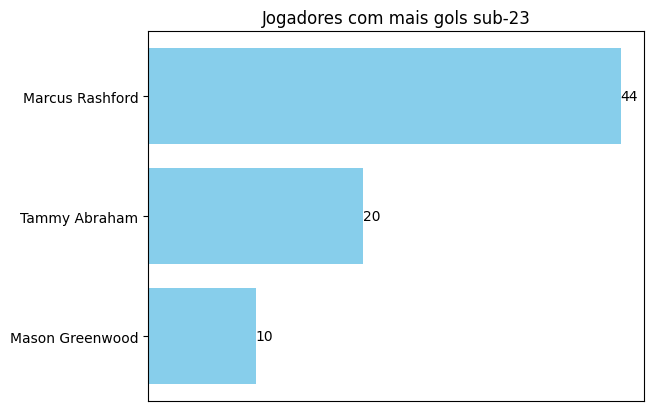

In [19]:
promessas_golsDF = jogadoresDF[(jogadoresDF['Goals'] > 9) & (jogadoresDF['Age'] < 23)]
#Coloca grafico em ordem decrescente
promessas_golsDF = promessas_golsDF.sort_values(by='Goals', ascending=True)
barras7 = plt.barh(promessas_golsDF['Name'], promessas_golsDF['Goals'], color = 'skyblue')
plt.bar_label(barras7)
plt.xticks([])
plt.title('Jogadores com mais gols sub-23')

#0,31 Rash |  0,29 | 0,29
atac = jogadoresDF.loc[jogadoresDF['Name'] == 'Dwight McNeil', ['Club']]
display(atac)


plt.show()

### Mais assistências sub-23

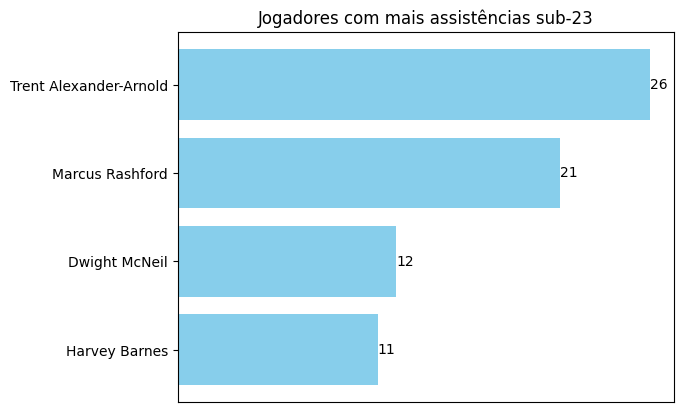

In [20]:
promessas_assDF = jogadoresDF[(jogadoresDF['Assists'] > 9) & (jogadoresDF['Age'] < 23)]
#Coloca grafico em ordem decrescente
promessas_assDF = promessas_assDF.sort_values(by='Assists', ascending=True)
barras8 = plt.barh(promessas_assDF['Name'], promessas_assDF['Assists'], color = 'skyblue')
plt.bar_label(barras8)
plt.xticks([])
plt.title('Jogadores com mais assistências sub-23')
plt.show()

### Mais participações para gol sub-23

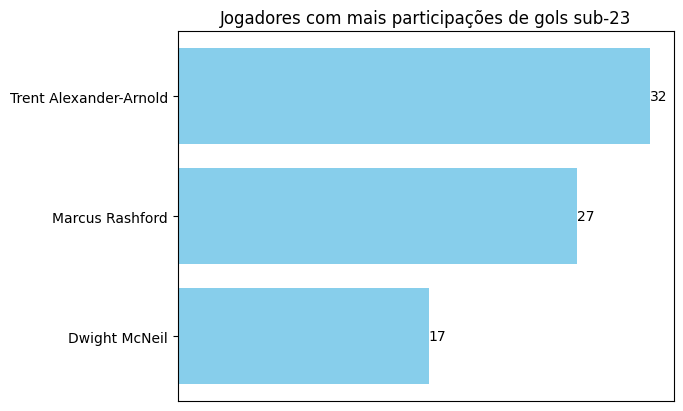

In [21]:
promessas_participacaoDF = jogadoresDF[(jogadoresDF['Big chances created'] > 9) & (jogadoresDF['Age'] < 23)]
#Coloca grafico em ordem decrescente
promessas_participacaoDF = promessas_participacaoDF.sort_values(by='Big chances created', ascending=True)
barras9 = plt.barh(promessas_participacaoDF['Name'], promessas_participacaoDF['Big chances created'], color = 'skyblue')
plt.bar_label(barras9)
plt.xticks([])
plt.title('Jogadores com mais participações de gols sub-23')
plt.show()

### Mais interceptções sub-23

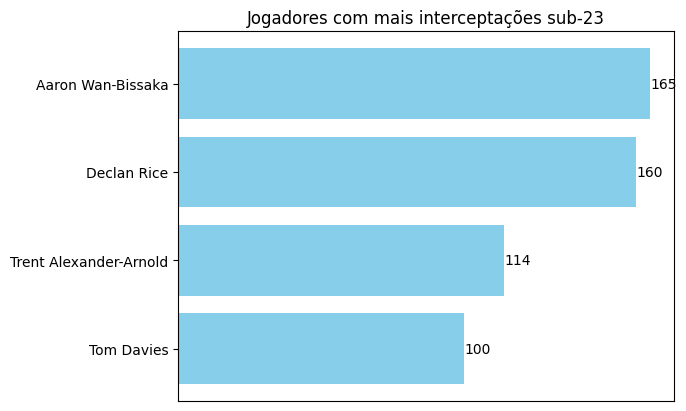

In [22]:
promessas_interceptacaoDF = jogadoresDF[(jogadoresDF['Interceptions'] > 70) & (jogadoresDF['Age'] < 23)]
#Coloca grafico em ordem decrescente
promessas_interceptacaoDF = promessas_interceptacaoDF.sort_values(by='Interceptions', ascending=True)
barras10 = plt.barh(promessas_interceptacaoDF['Name'], promessas_interceptacaoDF['Interceptions'], color = 'skyblue')
plt.bar_label(barras10)
plt.xticks([])
plt.title('Jogadores com mais interceptações sub-23')
plt.show()

### Mais desarmes bem sucedidos sub-23

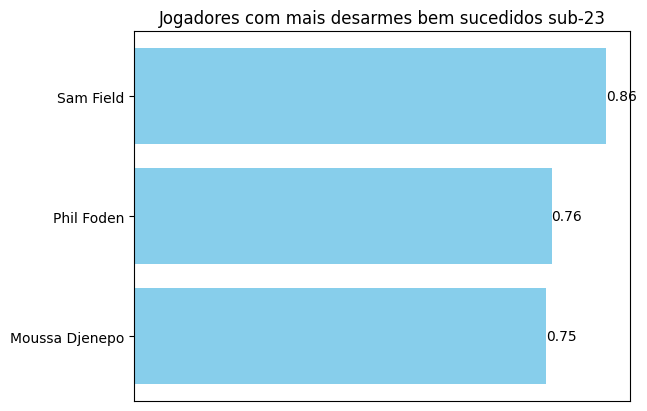

In [28]:
promessas_desarmesDF = jogadoresDF[(jogadoresDF['Tackle success %'] > 0.7) & (jogadoresDF['Age'] < 23) & (jogadoresDF['Appearances'] > 17)]
promessas_desarmesDF = promessas_desarmesDF.sort_values(by='Tackle success %', ascending=True)
barras11 = plt.barh(promessas_desarmesDF['Name'], promessas_desarmesDF['Tackle success %'], color = 'skyblue')
plt.bar_label(barras11)
plt.xticks([])
plt.title('Jogadores com mais desarmes bem sucedidos sub-23')
plt.show()

### Maiores médias de passe sub-23

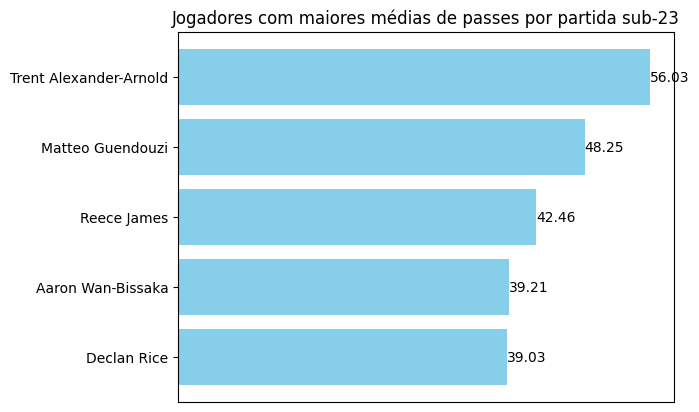

In [24]:
promessas_passesDF = jogadoresDF[(jogadoresDF['Passes per match'] > 39) & (jogadoresDF['Age'] < 23) & (jogadoresDF['Appearances'] > 17)]
#Coloca grafico em ordem decrescente
promessas_passesDF = promessas_passesDF.sort_values(by='Passes per match', ascending=True)
barras12 = plt.barh(promessas_passesDF['Name'], promessas_passesDF['Passes per match'], color = 'skyblue')
plt.bar_label(barras12)
plt.xticks([])
plt.title('Jogadores com maiores médias de passes por partida sub-23')
plt.show()

### Mais duelos áereos vencidos sub-23

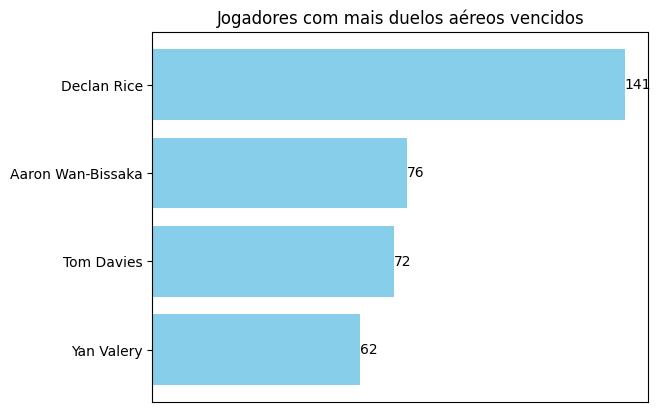

In [25]:
promessas_jogoAereoDF = jogadoresDF[(jogadoresDF['Aerial battles won'] > 60) & (jogadoresDF['Age'] < 23) & (jogadoresDF['Appearances'] > 17)]
#Coloca grafico em ordem decrescente
promessas_jogoAereoDF = promessas_jogoAereoDF.sort_values(by='Aerial battles won', ascending=True)

barras13 = plt.barh(promessas_jogoAereoDF['Name'], promessas_jogoAereoDF['Aerial battles won'], color = 'skyblue')
plt.bar_label(barras13)
plt.xticks([])
plt.title('Jogadores com mais duelos aéreos vencidos')
plt.show()

### Mais duelos vencidos sub-23

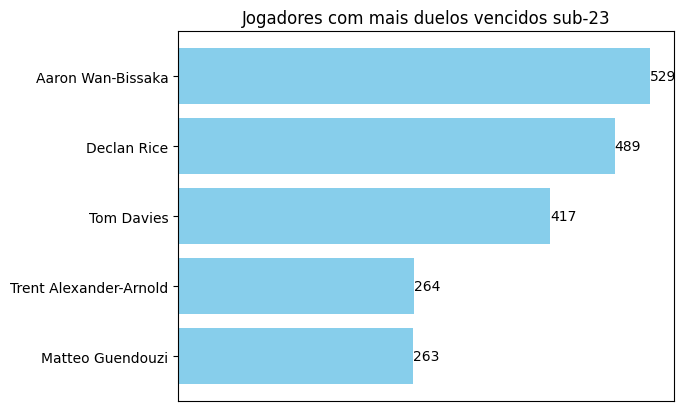

In [26]:
promessas_duelosDF = jogadoresDF[(jogadoresDF['Duels won'] > 250) & (jogadoresDF['Age'] < 23) & (jogadoresDF['Appearances'] > 17)]
promessas_duelosDF = promessas_duelosDF.sort_values(by='Duels won', ascending=True)
barras14 = plt.barh(promessas_duelosDF['Name'], promessas_duelosDF['Duels won'], color = 'skyblue')
plt.bar_label(barras14)
plt.xticks([])
plt.title('Jogadores com mais duelos vencidos sub-23')
plt.show()